In [1]:
import sys
sys.path.append('..')

In [2]:
from lpm_circ import *
from diff_circ import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
basic_circ_model = LPModel() # Define the model

basic_circ_model.add_unit(LPunit(0, 0.03, C=1, links=[[24],[1]], ics=[53,0], D_out=True)) # Right atrium
basic_circ_model.units[0].assign_nonlinear("C", pvt_ra) # Add the right atrium PV time relationship
basic_circ_model.add_unit(LPunit(1, 0.01, C=1, links=[[0],[2,5]], ics=[110,0], D_out=True)) # Right ventricle
basic_circ_model.units[1].assign_nonlinear("C", pvt_rv) # Add the right ventricle PV time relationship
basic_circ_model.add_unit(LPunit(2, 0.05, C=1.5, L = 0.001, links=[[1],[3]], ics=[64,0,0])) # R. proximal artery
basic_circ_model.add_unit(LPunit(3, 0.06, C=9, links=[[2],[4]], ics=[140,0])) # R. distal artery
basic_circ_model.add_unit(LPunit(4, 0.07, C=15, links=[[3],[8]], ics=[130,0])) # R. pulmonary vein
basic_circ_model.add_unit(LPunit(5, 0.05, C=1.5, L = 0.001, links=[[1],[6]], ics=[64,0,0])) # L. proximal artery
basic_circ_model.add_unit(LPunit(6, 0.06, C=9, links=[[5],[7]], ics=[140,0])) # L. distal artery
basic_circ_model.add_unit(LPunit(7, 0.07, C=15, links=[[6],[8]], ics=[130,0])) # L. pulmonary vein
basic_circ_model.add_unit(LPunit(8, 0.02, C=1, links=[[4,7],[9]], ics=[63,0], D_out=True)) # Left atrium
basic_circ_model.units[8].assign_nonlinear("C", pvt_la)
basic_circ_model.add_unit(LPunit(9, 0.02, C=1, links=[[8],[10,15,18,21]], ics=[123,0], D_out=True)) # Left ventricle
basic_circ_model.units[9].assign_nonlinear("C", pvt_lv)
basic_circ_model.add_unit(LPunit(10, 8, C=0.7, links=[[9],[11,13]], ics=[111,0])) # Brachiocephalic artery
basic_circ_model.add_unit(LPunit(11, 0.5, C=3, links=[[10],[12]], ics=[29,0])) # R. subclavian artery
basic_circ_model.add_unit(LPunit(12, 0.27, C=9, links=[[11],[24]], ics=[66,0])) # R. subclavian vein
basic_circ_model.add_unit(LPunit(13, 0.5, C=2, links=[[10],[14]], ics=[20,0])) # R. internal carotid artery
basic_circ_model.add_unit(LPunit(14, 0.25, C=9, links=[[13],[24]], ics=[69,0])) # R. jugular vein
basic_circ_model.add_unit(LPunit(15, 12, C=0.7, links=[[9],[16]], ics=[117,0])) # L. common carotid artery
basic_circ_model.add_unit(LPunit(16, 0.5, C=3, links=[[15],[17]], ics=[37,0])) # L. internal carotid artery
basic_circ_model.add_unit(LPunit(17, 0.25, C=9, links=[[16],[24]], ics=[66,0])) # L. jugular vein
basic_circ_model.add_unit(LPunit(18, 12, C=0.7, links=[[9],[19]], ics=[117,0])) # L. subclavian artery
basic_circ_model.add_unit(LPunit(19, 0.5, C=2, links=[[18],[20]], ics=[19,0])) # L. upper arm artery
basic_circ_model.add_unit(LPunit(20, 0.25, C=9, links=[[19],[24]], ics=[66,0])) # L. subclavian vein
basic_circ_model.add_unit(LPunit(21, 1.2, C=0.8, L=0.001, links=[[9],[22]], ics=[64,0,0])) # Desc. aorta
basic_circ_model.add_unit(LPunit(22, 1, C=1, links=[[21],[23]], ics=[217,0])) # Systemic arteries
basic_circ_model.units[22].assign_nonlinear("C", pv_proxart)
basic_circ_model.units[22].assign_nonlinear("R", rv_proxart)
basic_circ_model.add_unit(LPunit(23, 0.2, C=1, links=[[22],[24]], ics=[2526,0])) # Systemic veins
basic_circ_model.units[23].assign_nonlinear("C", pv_sysv)
basic_circ_model.add_unit(LPunit(24, 1, C=1, links=[[12,14,17,20,23],[0]], ics=[170,0])) # Vena cava
basic_circ_model.units[24].assign_nonlinear("C", pv_vena)
basic_circ_model.units[24].assign_nonlinear("R", rv_vena)

In [18]:
# Base parameters
dt = .001
T = 30

# Test 1 -- Baseline f_con = 0.5
test_1 = basic_circ_model.solve_model(dt, T, run_diagnostic=True, diagnostic_time=10)
pressures_1 = basic_circ_model.get_pressures()

# Test 2 -- Baseline f_con = 0.3
test_2 = basic_circ_model.solve_model(dt, T, run_diagnostic=True, diagnostic_time=10, f_con=0.3)
pressures_2 = basic_circ_model.get_pressures(f_con=0.3)

# Test 2 -- f_con = 0.7
test_3 = basic_circ_model.solve_model(dt, T, run_diagnostic=True, diagnostic_time=10, f_con=0.7)
pressures_3 = basic_circ_model.get_pressures(f_con=0.7)

Got to time 10.0156988468761 in 2.482717275619507 s
Got to time 10.001506355829683 in 2.4869682788848877 s
Got to time 10.00003892355865 in 2.4879682064056396 s
Got to time 10.000139113322376 in 2.4889681339263916 s
Got to time 10.000001364490373 in 2.4899680614471436 s
Got to time 20.004790642144165 in 5.007745742797852 s
Got to time 20.00479064214417 in 5.009740352630615 s
Got to time 20.00003498245429 in 5.011740446090698 s
Got to time 20.000101447905138 in 5.013742923736572 s
Got to time 20.000001964710236 in 5.016740560531616 s
Got to time 20.000000994142482 in 5.018740653991699 s
Got to time 30.006437599670033 in 7.522613525390625 s
Got to time 30.001247656773927 in 7.52460503578186 s
Got to time 30.0002096681947 in 7.526616096496582 s
Got to time 30.00003239113567 in 7.528616189956665 s
Got to time 30.000032513039024 in 7.5296080112457275 s
Got to time 30.000089199957653 in 7.530606269836426 s
Got to time 30.00000340004751 in 7.531606197357178 s
Got to time 30.00000034473896 in 

[None, None]

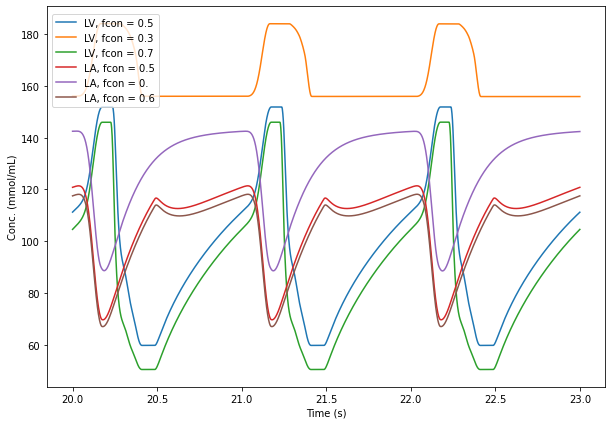

In [19]:
# Left ventricle shapes changing f_con
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], test_1[:,9][int(20/dt):int(23/dt)], label="LV, fcon = 0.5")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], test_2[:,9][int(20/dt):int(23/dt)], label="LV, fcon = 0.3")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], test_3[:,9][int(20/dt):int(23/dt)], label="LV, fcon = 0.7")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], test_1[:,8][int(20/dt):int(23/dt)], label="LA, fcon = 0.5")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], test_2[:,8][int(20/dt):int(23/dt)], label="LA, fcon = 0.3")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], test_3[:,8][int(20/dt):int(23/dt)], label="LA, fcon = 0.7")
ax.set(xlabel="Time (s)", ylabel="Conc. (mmol/mL)")#, title="Concentration of solute in heart chambers over time")
fig.legend(loc="upper left", bbox_to_anchor=(.125, .875))
fig.set(figheight=7, figwidth=10)

[None, None]

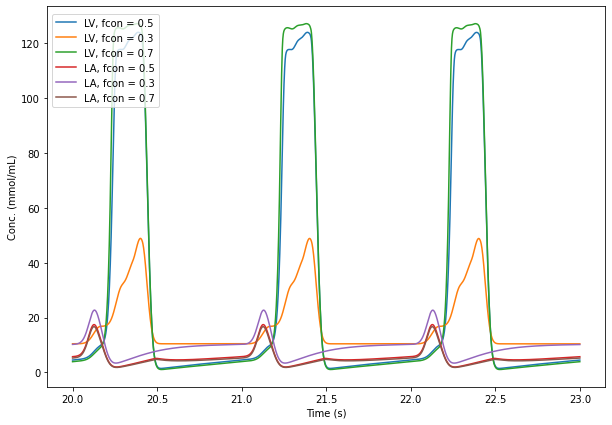

In [21]:
# Left ventricle shapes changing f_con
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], pressures_1[9][int(20/dt):int(23/dt)], label="LV, fcon = 0.5")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], pressures_2[9][int(20/dt):int(23/dt)], label="LV, fcon = 0.3")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], pressures_3[9][int(20/dt):int(23/dt)], label="LV, fcon = 0.7")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], pressures_1[8][int(20/dt):int(23/dt)], label="LA, fcon = 0.5")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], pressures_2[8][int(20/dt):int(23/dt)], label="LA, fcon = 0.3")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(20/dt):int(23/dt)], pressures_3[8][int(20/dt):int(23/dt)], label="LA, fcon = 0.7")
ax.set(xlabel="Time (s)", ylabel="Conc. (mmol/mL)")#, title="Concentration of solute in heart chambers over time")
fig.legend(loc="upper left", bbox_to_anchor=(.125, .875))
fig.set(figheight=7, figwidth=10)